In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
iris = datasets.load_iris()
print(iris)
irisx = iris.data
irisy = iris.target
print(irisx.shape)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


-- Epoch 1
Norm: 0.27, NNZs: 4, Bias: -0.200000, T: 42, Avg. loss: 0.000563
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.27, NNZs: 4, Bias: -0.200000, T: 84, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.27, NNZs: 4, Bias: -0.200000, T: 126, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.27, NNZs: 4, Bias: -0.200000, T: 168, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.27, NNZs: 4, Bias: -0.200000, T: 210, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.27, NNZs: 4, Bias: -0.200000, T: 252, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 6 epochs took 0.00 seconds
-- Epoch 1
Norm: 0.31, NNZs: 4, Bias: -0.100000, T: 42, Avg. loss: 0.065761
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.21, NNZs: 4, Bias: -0.200000, T: 84, Avg. loss: 0.075742
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.39, NNZs: 4, Bias: -0.100000, T: 126, Avg. l

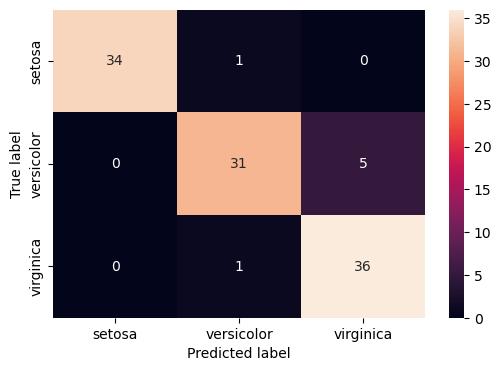

In [55]:
#Creating our training and test data. In the actual data set, our data is the actual details of the flowers, and
#our target is just the array in the dataset with the actual values we want to get; 0, 1, and 2
X = iris.data
y = iris.target
target_names = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.72, random_state=1)

#Function for visualisation
def confusionM(y_test, y_predict, target_names):
    cMatrix = confusion_matrix(y_test, y_predict)
    df_cm = pd.DataFrame(cMatrix,index=target_names,columns=target_names)
    plt.figure(figsize = (6,4))
    cm = sns.heatmap(df_cm,annot=True,fmt="d")
    cm.yaxis.set_ticklabels(cm.yaxis.get_ticklabels(),rotation=90)
    cm.xaxis.set_ticklabels(cm.xaxis.get_ticklabels(),rotation=0)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

#Randomization of the test and training data 
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

#Creation of the perceptron, still figuring out everything with this
perceptron = Perceptron(eta0=0.1, random_state=1, verbose=1)
perceptron.fit(X_train_scaled, y_train)

y_predict = perceptron.predict(X_test_scaled)

#Prints out the accuracy of the perceptron and the visualization of the results
#The confusion matrix will tell us how many the model got right, and more importantly WHICH ones it got wrong
#For example it predicted that there were 21 versicolor, however it could not accurately guess 5 of them
#And as such labeled them as virginica
print('Accuracy: %.3f' % accuracy_score(y_test, y_predict))
print('Accuracy: %.3f' % perceptron.score(X_test_scaled, y_test))
confusionM(y_test, y_predict, target_names)